In [1]:
import numpy as np
import cptac
import cnvutils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CHROMOSOME = '8'
ARM = 'p'
TRANS_OR_CIS = 'cis'

In [3]:
ttest_results_file = f"{CHROMOSOME}{ARM}_{TRANS_OR_CIS}effects_ttest.tsv"

ttest_results = pd.\
read_csv(ttest_results_file, sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")
id_cols = [col for col in ttest_results.columns if not 'Database_ID' in col]
ttest_results = ttest_results[id_cols]
pvalue_cols = [col for col in ttest_results.columns if 'pvalue' in col]
ttest_results = ttest_results[pvalue_cols]

In [4]:
def get_cancer(val):
    val_list = val.split('_')
    return val_list[0].upper()

In [5]:
ttest_results_long = ttest_results.reset_index().melt(id_vars='protein', var_name='cancer').sort_values('protein')
ttest_results_long['cancer'] = ttest_results_long.cancer.apply(get_cancer)
ttest_results_long

,protein,cancer,value
0,ADAMDEC1,BRCA,8.742524e-01
198,ADAMDEC1,HNSCC,7.556452e-01
495,ADAMDEC1,OVARIAN,3.698054e-01
396,ADAMDEC1,LUAD,1.421191e-01
99,ADAMDEC1,COLON,5.845904e-01
297,ADAMDEC1,LSCC,8.531975e-01
199,AGPAT5,HNSCC,1.308774e-03
496,AGPAT5,OVARIAN,8.374570e-03
100,AGPAT5,COLON,1.167418e-03
298,AGPAT5,LSCC,9.501841e-02


In [6]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

In [7]:
results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

In [8]:
results = results.sort_values(['start_bp', 'cancer'])

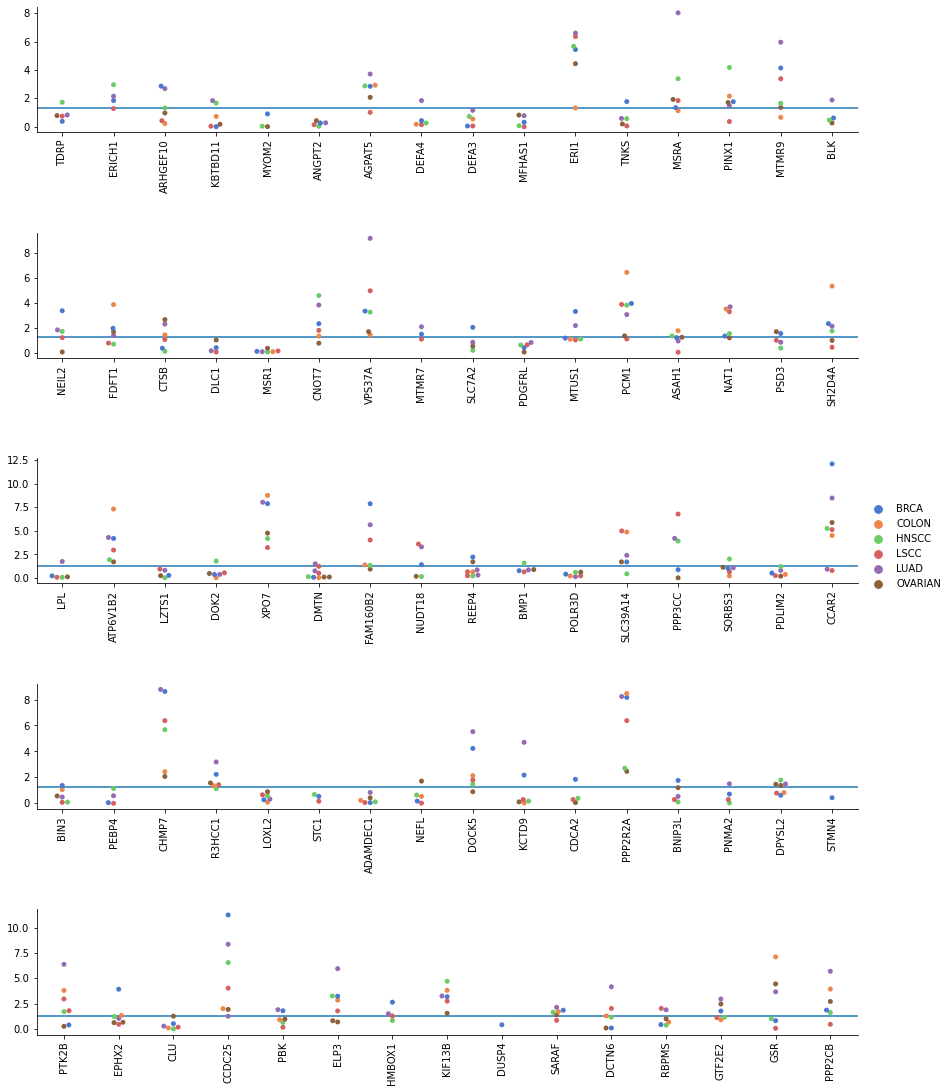

In [9]:
cnvutils.make_pvalue_plot(
    results,
    label_column='index', 
    value_column='value', 
    group_column='cancer', 
    labels_per_plot=16)
# plt.legend()

In [20]:
pd.options.display.max_rows = 500
locs = cnvutils.get_gene_locations()

chr8p = locs[(locs["chromosome"] == "8") & (locs["arm"] == "p")].\
sort_values(by=["arm", "start_bp"]).\
reset_index()

chr8p = chr8p[~chr8p["Name"].str.contains("\.", regex=True)].\
drop(columns="Database_ID").\
drop_duplicates(keep="first")

chr8p

,Name,chromosome,start_bp,end_bp,arm
3,WBP1LP3,8,155274.0,155481.0,p
4,OR4F21,8,166049.0,167043.0,p
7,RPL23AP53,8,213186.0,232231.0,p
9,ZNF596,8,232137.0,264703.0,p
17,FAM87A,8,375931.0,384079.0,p
18,FBXO25,8,406428.0,477967.0,p
23,TDRP,8,489792.0,545781.0,p
26,ERICH1,8,614746.0,738106.0,p
30,DLGAP2,8,737596.0,1708474.0,p
41,DLGAP2-AS1,8,1565509.0,1622417.0,p
